In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 模擬版資料做SVM

In [2]:
x = np.array([[6,6], [10,8], [3,7], [8,7]])

In [3]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [4]:
x[:,0]

array([ 6, 10,  3,  8])

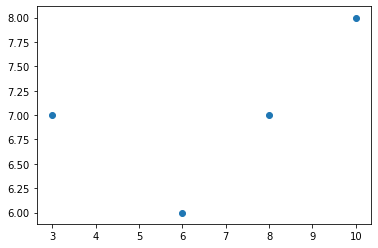

In [5]:
plt.scatter(x[:,0], x[:,1]) 

In [6]:
y = np.array([1,2,1,2]) #[3,7]和[6,6]一類

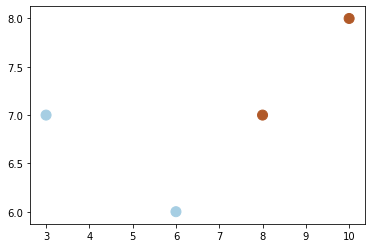

In [7]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s = 100)

### Step 1. 打開函數學習機

In [8]:
from sklearn.svm import SVC

In [9]:
clf = SVC(gamma ="auto") #設定gamma = auto 是因為不想看到警告

### Step 2. 學習

In [10]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 3. 預測

In [11]:
y_predict= clf.predict(x)

In [12]:
y_predict

array([1, 2, 1, 2])

In [13]:
xr = np.random.rand(100) *7+3 #x是3-10的數值，所以乘上7倍（10-3)＋3
yr = np.random.rand(100) *2+6 

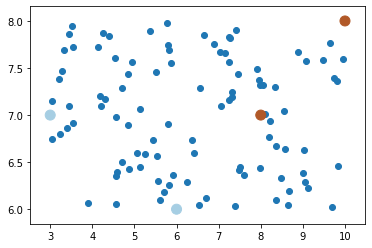

In [14]:
plt.scatter(xr,yr)
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s = 100)

In [15]:
print("x", xr[:5])
print("y", yr[:5])

x [5.81153146 8.66959229 9.0647083  9.47211659 5.82402629]
y [7.69203646 6.19244244 7.57432573 7.5880065  6.26161504]


In [16]:
X = np.c_[xr,yr] #把x,y合併

In [17]:
Y = clf.predict(X)

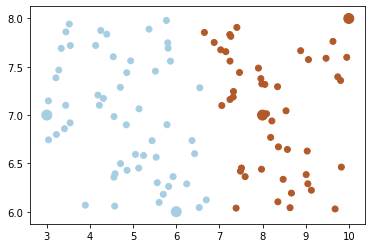

In [18]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s = 100)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="Paired")

### 結果呈現

In [27]:
#X = np.meshgrid(x_list)

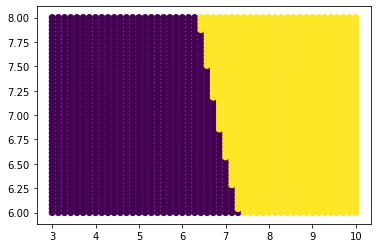

In [20]:
x_list = np.linspace(3,10,50)
y_list = np.linspace(6,8, 50)
X,Y = np.meshgrid(x_list, y_list)
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0], P[:,1], c=C)

In [21]:
X.ravel()

array([ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
        9.85714286, 10.        ])

In [22]:
X = np.c_[x_list, y_list]

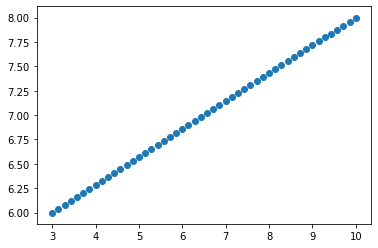

In [23]:
plt.scatter(X[:,0], X[:,1]) #看不懂！！！

## 插播：contour用法 
- 畫等高線

In [ ]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X, Y = np.meshgrid(xL, yL)

In [ ]:
X

In [ ]:
Y

In [ ]:
Z = np.random.randint(1,3, (4,4))

In [ ]:
Z

In [ ]:
Z = np.random.randint(1,3, (4,4))
plt.contourf(X,Y,Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

### 資料視覺化終極版

In [ ]:
x_arr = np.arange(2.5,10.5, 0.02)
y_arr = np.arange(5.5,8.5,0.02)
X,Y = np.meshgrid(x_arr, y_arr)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape) #Z要和X,Y的shape一致
plt.contourf(X,Y,Z, cmap = "Paired", alpha = 0.3)
plt.scatter(x[:,0], x[:,1], c=y, cmap = "Paired", s=150)

In [ ]:
X.shape #100列, 每列有350個點

In [ ]:
clf.predict(P) #predict即是我們的高度, 第一類或第二類

## Iris flower數據庫

In [28]:
from sklearn.datasets import load_iris

In [29]:
iris = load_iris()

In [30]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
# iris.data/ iris.target? 差別是什麼？
x = iris.data
y = iris.target

In [32]:
x[:5] #花瓣的長度和寬度; 花萼的長度和寬度

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [33]:
y[:5]  #分辨哪種花

array([0, 0, 0, 0, 0])

### 只選兩種數據做為參數 --> 容易畫圖

In [48]:
X = x[:,:2]

In [51]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [49]:
Y = y

In [50]:
len(X)

150

# 區分訓練資料、測試資料

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

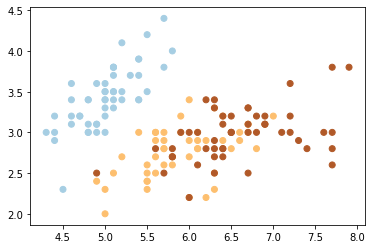

In [39]:
plt.scatter(X[:,0], X[:,1], c = Y, cmap = "Paired")

### Step 1.開一台函數學習機

In [40]:
clf = SVC(gamma = "auto")

### Step 2.訓練

In [41]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 3.預測

In [42]:
y_predict = clf.predict(x_test)

In [43]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [44]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [45]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

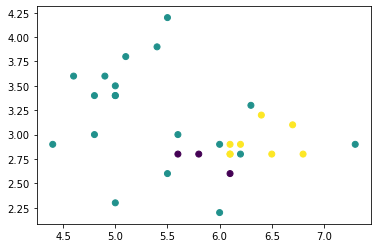

In [46]:
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict - y_test)

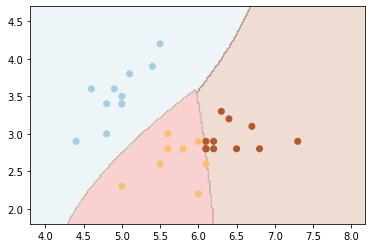

In [47]:
x0 = np.arange(3.8, 8.2, 0.02) #範圍, 每次要差多少
y0 = np.arange(1.8, 4.7, 0.02)

xm, ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap="Paired", alpha =0.2)
plt.scatter(x_test[:,0], x_test[:,1], cmap = "Paired", c=y_predict)